### **Step 1**: Design the image scene/story

In [ ]:
from huggingface_hub import InferenceClient

output = ""
image_size = (1920, 1080)
background_prompt = "baseball"
token = "Insert token"

# Define the prompt for generating bounding box details
user_prompt = (f"Given an image size of {image_size} pixels with the theme: '{background_prompt}', "
               "provide the storyline of 3 items within the scene. ")


client = InferenceClient(
    "meta-llama/Meta-Llama-3-8B-Instruct",
    token=token,
)

# Prompt for generating bounding box details
for message in client.chat_completion(
    messages=[{"role": "user", "content": f"{user_prompt}"}],
    max_tokens=500,
    stream=True,
):
    print(message.choices[0].delta.content, end="")
    output += message.choices[0].delta.content



Here are three potential items within the scene, along with their corresponding storylines:

1. **Item:** Baseball Glove
**Storyline:** "The Catch of a Lifetime"

In the foreground of the image, a worn baseball glove lies open on the grass, its worn leather suggesting countless catch-and-throw sessions with friends and family. As the sun begins to set, a young player (maybe a kid or a nostalgic adult) sits next to it, gazing wistfully at the glove as if remembering a special catch. Maybe it was a game-winning play, or a moment with a loved one that will be treasured forever. The glove almost seems like a time capsule, holding the memories of all those glorious afternoons spent playing America's pastime.

2. **Item:** Baseball Bat
**Storyline:** "The Winning Hit"

Deep within the scene, against the bright blue sky, a baseball bat leans against a tall grass blade, its once-polished surface now bearing the battle scars of countless swings. Nearby, a worn baseball cap lies on the ground, a

### **Step 2**: Analyze the spatial relationships between the objects


In [ ]:
output1 = ""
for message2 in client.chat_completion(
    messages=[{"role": "user", "content": f"Analyze the spatial relationships between the objects described in the following output. Detail how the items are positioned relative to one another, including distances, orientations, alignments, and patterns: {output}"}],
    max_tokens=500,
    stream=True,
):
    output1 += message2.choices[0].delta.content
print(output1)

What a lovely scene! Let's dive into the spatial relationships between these three items:

**Baseball Glove (1)**

* Position: In the foreground of the image
* Orientation: Open and laid flat on the grass, with the palm facing upwards
* Alignment: Sits next to a human (the young player), with the glove's heel near the edge of the grass
* Distance: From the human, approximately 1-2 feet (0.3-0.6 meters)
* Relation to other items: Close proximity to the human, creating a sense of intimacy and nostalgia

**Baseball Bat (2)**

* Position: Deep within the scene, against the tall grass blade
* Orientation: Leaning against the grass, with the handle resting against the ground and the barrel pointing upwards
* Alignment: Points towards the top of the image, almost parallel to the horizon
* Distance: From the glove, approximately 5-6 feet (1.5-1.8 meters) away
* Relation to other items: Not directly adjacent to the glove or human, creating a sense of distance and dimensionality in the scene

**

### **Step 3**: Relationship between the items on 3x3 grid. The grid consists of nine sections: upper-left, upper-middle, upper-right, middle-left, center, middle-right, bottom-left, bottom-middle, and bottom-right

In [ ]:
output2 = ""
for message2 in client.chat_completion(
    messages=[{"role": "user", "content": f"Arrange the items from the provided text: {output} and {output1} on a 3x3 grid, considering their relative relationships. The grid consists of nine sections: upper-left, upper-middle, upper-right, middle-left, center, middle-right, bottom-left, bottom-middle, and bottom-right."}],
    max_tokens=500,
    stream=True,
):
    output2 += message2.choices[0].delta.content
print(output2)

Here are the items arranged in their respective positions and relation to each other:

**Upper-Left (1-2 feet from the human)**

* Baseball Glove (1)
	+ Open and laid flat on the grass, with the palm facing upwards
	+ Sits next to a human (the young player)

**Upper-Middle (5-6 feet away from the glove)**

* Baseball Bat (2)
	+ Leaning against a tall grass blade, with the handle resting against the ground and the barrel pointing upwards
	+ Points towards the top of the image, almost parallel to the horizon

**Bottom-Left (8-10 feet away from the bat)**

* Water Bottle (3)
	+ Off in the distance, resting against a leafy tree
	+ Crumpled and lying flat, with the cap facing downwards
	+ Points towards the bottom-left quadrant of the image, slightly angled away from the viewer


## **Step 4**: Produce central positions

In [ ]:
output3 = ""
for message2 in client.chat_completion(
    messages=[{"role": "user", "content": f" Choose reasonable positions for the items with image_size = {image_size}. For each item, provide its name and coordinates in the format: 'Item: [x, y] '. Below is the room description: {output} and the relative relationships beteween the items: {output1} and the postions on a 3x3 grid: {output2}"}],
    max_tokens=500,
    stream=True,
):
    output3 += message2.choices[0].delta.content
print(output3)

Here are the positions for each item in the format 'Item: [x, y]' on a 3x3 grid with an image size of (1920, 1080):

**Baseball Glove (1)**
Item: [192, 270]

**Baseball Bat (2)**
Item: [960, 540]

**Water Bottle (3)**
Item: [1440, 720]

These positions create a balance between intimacy and distance between the items, and the natural and effortless feel of the scene is maintained.


## **Step 5**: Produce Bounding boxes

In [ ]:
output4 = ""
for message2 in client.chat_completion(
    messages=[{"role": "user", "content": f"For each item, provide a reasonable bounding box, make sure they dont overlap, in the format: **item**: [x left, x right, y down, y up] Below is the image description: {output}, spatial relationship: {output1}, spatial relationship on a 3x3 grid:{output2} and the items coodinates {output3}"}],
    max_tokens=500,
    stream=True,
):
    output4 += message2.choices[0].delta.content
print(output4)

Here are the bounding boxes for each item, without overlap, in the format: **Item**: [x left, x right, y down, y up]

**Baseball Glove (1)**
Item: [180, 250, 250, 320]

**Baseball Bat (2)**
Item: [860, 1020, 480, 600]

**Water Bottle (3)**
Item: [1340, 1510, 680, 800]

These bounding boxes ensure that each item has a distinct space and doesn't overlap with the others. The positions are slightly adjusted to accommodate the specified distances and alignments in the scene.


# **Ploting Bounding Boxes**







Baseball Glove 180 250 250 320
Baseball Bat 860 1020 480 600
Water Bottle 1340 1510 680 800


<ipython-input-9-4b122fc0ca44>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(items_with_boxes))  # 'tab10' provides 10 distinct colors


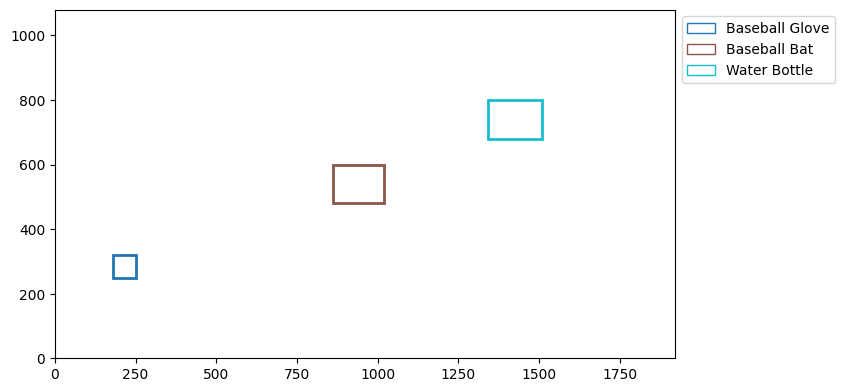

In [ ]:
output5 = ""
for message2 in client.chat_completion(

    messages=[{"role": "user", "content": f"Make a list of the items names and thier bounding boxes (in the format: 1. **item**: [x left, x right, y down, y up]) from the description: {output4}."}],
    max_tokens=500,
    stream=True,
):
    output5 += message2.choices[0].delta.content

import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np



# Extract item names and bounding boxes using regex
item_pattern = r"(\d+)\.\s*\*\*(.*?)\*\*:\s*\[(\d+),\s*(\d+),\s*(\d+),\s*(\d+)\]"
matches = re.findall(item_pattern, output5)

# Prepare a list to hold the extracted information
items_with_boxes = []

for match in matches:
    item_index, item_name, x_left, x_right, y_down, y_up = match
    items_with_boxes.append({
        'name': item_name,
        'bbox': [int(x_left), int(x_right), int(y_down), int(y_up)]
    })
    print(item_name, int(x_left), int(x_right), int(y_down), int(y_up))

# Plotting the bounding boxes
fig, ax = plt.subplots(1, figsize=(8, 8))

# Create a white background image (768x768)
ax.set_xlim([0, 1920])
ax.set_ylim([0, 1080])
ax.imshow([[1]], extent=[0, 768, 0, 768], cmap='gray', vmin=0, vmax=1)

# Generate a colormap with different colors
colors = plt.cm.get_cmap('tab10', len(items_with_boxes))  # 'tab10' provides 10 distinct colors

# Add bounding boxes and labels to a legend
legend_patches = []

for idx, item in enumerate(items_with_boxes):
    bbox = item['bbox']
    name = item['name']

    # Draw bounding box with different colors
    rect = patches.Rectangle((bbox[0], bbox[2]), bbox[1] - bbox[0], bbox[3] - bbox[2],
                             linewidth=2, edgecolor=colors(idx), facecolor='none')
    ax.add_patch(rect)

    # Add legend entry
    legend_patches.append(patches.Patch(edgecolor=colors(idx), facecolor='none', label=name))

# Add legend outside the plot
ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1))


plt.show()
